# Linear Regression using TensorFlow

* This notebook is adapted from [Aymeric Damian's notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/Linear_regression.ipynb) 

* Clone the full collection from [here](https://github.com/aymericdamien/TensorFlow-Examples).

We are assuming that this is not the first time you are using Linear and logistic regression, if it isnt, 
we recommend you got back and review:
* [linear regression](http://www.dataschool.io/linear-regression-in-python/)
* [Logistic Regression](http://www.dataschool.io/guide-to-logistic-regression/)

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)

# Linear Regression 

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the others are considered to be dependent variables. For our example, we want to relate the variable Y to the variable X using a linear regression model. 

Specification of the model:
$y$ = $b$ + $w_1$$x_1$ + ... +  $w_p$$x_p$
- $y$ is the regressed variable
- $w$'s are the weights
- $b$ is the bias term
- $x$'s are the features used to model y



For this example, we will use some toy data so that we can get a hang of how to build a model without worrying about how to manage the data.

### Some toy data

In [ ]:

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

## Linear Regression Model

New TensorFlow concepts:
1. Placeholders $\sim$ input ports
1. Variables $\sim$ Variables
1. Namescopes $\sim$ subroutine name-spaces

### [Placeholders](https://www.tensorflow.org/api_guides/python/io_ops#Placeholders) 
Define entry points for training data. Similar to *ports* in computer systems.

In [ ]:
# Defining the computational graph for linear regression with 1 explanatory variable
# p = 1

# Input to the graph
y = tf.placeholder(dtype = tf.float32, name = 'InputData') # Placeholders - https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
x = tf.placeholder(dtype = tf.float32, name = 'LabelData')

### [Variables](https://www.tensorflow.org/programmers_guide/variables)
Similar to variables in a programming language such as python.

In [ ]:
# Model parameters are defined using variables
# Variables retain their value even outside the bounds of a session's run call
w = tf.Variable(initial_value = rng.randn(), name = "weight") 
b = tf.Variable(initial_value = rng.randn(), name = "bias")

### name_scope
Defines a name-space which is used by a function. and defines a node in the TensorFlow graph.

In [ ]:
# Connecting up the nodes in our linear model
# y = b + Wx
with tf.name_scope('model'):
    prediction = tf.add(b, tf.multiply(w, x))

# prediction holds the tensor that is the output of the operation add which takes tensors b, and the output of the multiply operation between the weight w, and the input x

First we will build the computational graph for linear regression based on the algebraic equation that the model is defined by. We will use two new TensorFlow concepts, placeholders and variables, to build our graph. 

Placeholders are entry points into the graph allowing for training data to be passed into the graph.

Variables are used to represent parameters of the graph which need to retain their value between runs (iterations) while training in a session. 

## Learning the Regression parameters

In [ ]:
# Defining loss for our model
# Loss is the mean squared error between actual $y$ and predicted $y$
with tf.name_scope('Loss'):
    loss = tf.reduce_sum( input_tensor = tf.pow(prediction-y, 2))/(2*n_samples)
# reduce_sum is a function to compute the sum across dimensions of a tensor. In this case, the input tensor is a 1 x n_samples dimensional tensor of the prediction errors corresponding to the training samples  
# https://www.tensorflow.org/api_docs/python/tf/reduce_sum
tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()
#Our previous definitions implicitly creates the relation between the loss and the variables w and b 

# We can use gradient descent to train our linear model
# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
learning_rate = 0.01
with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
with tf.name_scope('Loss'):
    loss = tf.reduce_sum( input_tensor = tf.pow(prediction-y, 2))/(2*n_samples)

tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()

learning_rate = 0.01
with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

The computational graph that we just defined:

<center><img src="../../resources/img/LinearRegression.png" alt="An example image of an ML model visualized using TensorBoard" style="width:800px;"></center>

In [ ]:
# We also need an operation to initialize our global variables (w and b)
init = tf.global_variables_initializer()

New concepts:
3. reduce_sum operation: https://www.tensorflow.org/api_docs/python/tf/reduce_sum
4. Gradient descent optimizer: https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

We now have a complete computational graph. Each run of the optimizer takes one sample of X and Y as input, makes a prediction. The optimizer updates the free variables in its loss function based on the prediction for that input.

## Executing the Computational Graph in a session

- Training the computational graph
```
with tf.Session() as sess:
    sess.run(init)
    
    for each epoch:
        for each (training sample:sample_x, training label:sample_y):
            sess.run(optimizer, feed_dict={x: sample_x, y: sample_y})
```

- Evaluating the computational graph to calculate training loss:
```
with tf.Session() as sess:
    c = sess.run(loss, feed_dict={x:train_X, y:train_Y})
```

In [ ]:
# We can now run the computational graph in a session
training_epochs = 1000              # We will run our model 1000 times
display_step = 1                 # Display the loss every 100 runs
final_w, final_b = 0,0
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Fit all training data
    for epoch in range(training_epochs):
        for (sample_x, sample_y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={x: sample_x, y: sample_y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c , summary= sess.run([loss, merged_summary_op], feed_dict={x: train_X, y:train_Y})
            summary_writer.add_summary(summary, epoch)
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), \
                "w=", sess.run(w), "b=", sess.run(b))

    print("Optimization Finished!")
    training_loss = sess.run(loss, feed_dict={x: train_X, y:train_Y})
    print("Training loss=", training_loss, "w=", sess.run(w), "b=", sess.run(b), '\n')
    final_w, final_b = sess.run(w), sess.run(b)

In [ ]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, final_w * train_X + final_b, label='Fitted line')
plt.legend()
plt.show()

# Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) refers to a classifier that classifies an observation into one of two classes, and multinomial logistic regression is used when classifying into more than two classes, but the two terms are used interchangebly. We will look at an example where we want to classify handwritten digits into one of 10 classes: 0-9

The logistic regression model works in a similar fashion to a linear regression model except that the final sum of the product between the weights and dependent variable is passed through a function that transforms the input to lie between 0 and 1. This function is called the logistic function, giving the model its name.

We can create a logistic regressor in the same way as we created a linear regression computational graph.

We will use the MNIST database of [handwritten digits](http://yann.lecun.com/exdb/mnist/) for this example.

TensorFlow provides easy access to some sample data sets. We can access the mnist dataset a TensorFlow dataset that contains 60,000 training images and their corresponding labels as well as 10,000 testing images and their corresponding labels.
- Each image is 28 pixels by 28 pixels
- Each image represents a digit between 0 and 9
- The labels are one-hot encoded => each label is a 1x10 vector

* Logistic regression model is a classifier
* Outputs a conditional probability: $p(\ label\ $| $\ data)$


$$
p(y=j | X) = \frac{1}{Z}g(\Theta_j \cdot X +b_j)
$$

The prediction is given as 

$$ g(z) = \frac{e^z}{e^z + e^{-z}}  = \frac{1}{1+e^{-2z}}$$ 

is the [soft max](https://en.wikipedia.org/wiki/softmax_function) and it "squashes" the input variable $z$ to the range $[0,1]$

It squashes the output of the linear function $\sum_{i=0}^{n} \theta_{i} x_{i}$ to vary between zero and one.

The sigmoid function is softmax function with just $K$ = 2 

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


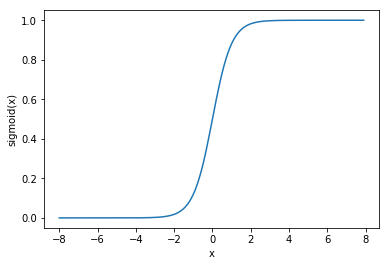

In [3]:
from matplotlib import pylab
%pylab inline
import pylab as plt
import numpy as np
def logistic(x):
    return (1 / (1 + np.exp(-2*x)))
x = np.arange(-8, 8, 0.1)
y = [logistic(f) for f in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

- The logistic regression model is trained by finding the $\theta$ that maximizes the conditional log likelihood:
$$ LL(\Theta) = \sum_{j=1}^m \log P(l_j | X_j)$$

### Data Flow Diagram
<img src="../resources/img/TensorFlow.png">

# Logistic Regression in Tensorflow 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
rng = np.random
logs_path = 'logs/lesson1'

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Processing Input 

First we will build the **computational graph** for logistic regression.

We will use two new TensorFlow concepts:

* **Placeholders** are entry points into the graph allowing for training data to be passed into the graph.

* **Variables** are used to represent parameters of the graph which need to retain their value between runs (iterations) while training in a session. 

```python
# Placeholder1: flattened images of dimension 28*28 = 784
x = tf.placeholder(dtype = tf.float32, shape = [None, 784], name = "inputData") 
# Placeholder2: one-hot encoded labels for the 10 classes
y = tf.placeholder(dtype = tf.float32, shape = [None, 10], name = "actualLabel")

W = tf.Variable(initial_value = tf.zeros([784, 10]), name = "weight")
b = tf.Variable(initial_value = tf.zeros([10]), name = "bias")

with tf.name_scope('model'):
    prediction = tf.nn.softmax(tf.add(b, tf.matmul(x, W))) 
```

For more information, see:

1. **Placeholders**: https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
2. **Variables**: https://www.tensorflow.org/programmers_guide/variables

* Placeholders receive input
    * Placeholder1: flattened images of dimension 28*28 = 784
    * Placeholder2: one-hot encoded labels for the 10 classes

### Allowing batch sizes that are not known a-priori

* Specifying `None` as a dimension in a placeholder allows for variable batch sizes.
* For example `[None, 784]` defines a sequence of vectors of dimension 784. The length of the sequence is not specified.

* Variables change state
    * `W` and `b` are the variables in logistic regression
    * Initialized with random values

To quote [TensorFlow's programmer's guide](https://www.tensorflow.org/programmers_guide/variables):
>A TensorFlow variable is the best way to represent shared, persistent state manipulated by your program.

>Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running ops on it. Unlike tf.Tensor objects, a tf.Variable exists outside the context of a single session.run call.

>Internally, a tf.Variable stores a persistent tensor. Specific ops allow you to read and modify the values of this tensor. These modifications are visible across multiple tf.Sessions, so multiple workers can see the same values for a tf.Variable.

* Each placeholder or variable is an edge in the TensorFlow computation graph
    * Edges represent Tensors
    * Tensors are n-dimensional arrays (Matrices are 2 dimensional tensors)

* Each operation on Tensors is a node in the TensorFlow graph
    * Nodes take Tensors as input
    * Return Tensors as output

* In particular, the operation in our code is:
```python
prediction = tf.nn.softmax(tf.add(b, tf.matmul(x, W))) # Softmax
```
* it is a composition of:
   * `tf.matmul(x, W))` : performs dot product between the input vector `x` and the weights vector `W`
   * `tf.add(b, tf.matmul(x,W))` : returns the tensor sum between the tensors b and the output of the inner computation 
   * `tf.nn.softmax(A)` : applies the softmax function on each value of the input tensor (default is along the first dimension)

In [1]:
# Lets run the code we just described

x = tf.placeholder(dtype = tf.float32, shape = [None, 784], name = "inputFeatures") # mnist data image of shape 28*28=784
y = tf.placeholder(dtype = tf.float32, shape = [None, 10], name = "actualLabel") # 0-9 digits recognition => 10 classes

W = tf.Variable(initial_value = tf.zeros([784, 10]), name = "weight")
b = tf.Variable(initial_value = tf.zeros([10]), name = "bias")

with tf.name_scope('model'):
    prediction = tf.nn.softmax(tf.add(b, tf.matmul(x, W))) # Softmax

NameError: name 'tf' is not defined

## Loss and Optimization 

Our model is complete, but our computational graph is not yet complete. To complete the computational graph, we need to define a <b>loss function</b> and an <b>optimization strategy</b> to allow for the training of the free variables, `b` and `W` 

We will use **Cross-entropy loss** as our loss function.

* Cross-Entropy Loss for binary classification:
\begin{equation*}
loss = −\left(y\log{p} + \left(1−y\right)\log\left(1−p\right)\right)
\end{equation*}

This is the cross-entropy loss per example

For a sample and when the classes are zero and one, the above loss reduces to:

$$
batch\_loss = -\sum_{n=1}^{batch\_size}y*\log\left({1-p}\right)
$$

Tensorflow provides various inbuilt optimizers that allow for the optimization of objective functions. 

These inbuilt optimizers are mostly directed toward neural network optimization, but a user can specify their own optimization functions by extending a base class. 

The base class provides access to various methods that calculate the gradients at all points in our computational graph. 

However, for most industrial projects the set of optimizers provided by TensorFlow are sufficient. 

To optimize this linear regressor, we will use the inbuilt **Gradient Descent Optimizer**.

```python
with tf.name_scope('Loss'):
    #Loss is the cross entropy loss between actual label and predicted value
    loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), axis=1)

learning_rate = 0.01
with tf.name_scope('SGD'):
    #use gradient descent to train our linear model
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
```

For more information, see:
3. <b>reduce_sum</b> : https://www.tensorflow.org/api_docs/python/tf/reduce_sum
4. <b>Gradient Descent Optimizer</b> : https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

* Common loss functions are already implemented by TensorFlow
    - ex. cross-entropy loss

* `GradientDescentOptimizer` automatically computes the gradients of the function being optimized
* Autograd - Big innovation that makes software like Tensorflow and PyTorch possible

In [6]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 5

with tf.name_scope('Loss'):
    loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), axis=1))
                          
tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()
                          
with tf.name_scope('Optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [8]:
init = tf.global_variables_initializer()

We now have a complete computational graph. 

Each run of the optimizer takes a group of  Xs as input and makes a prediction. 

The prediction is compared against the inputted Ys to get the loss. 

The optimizer updates the free variables in its loss function based on the loss for that input.

## Executing the Model

TensorFlow uses the **`tf.Session`** class to represent a connection between the client program---typically a Python program, although a similar interface is available in other languages---and the C++ runtime. 

A `tf.Session` object provides access to devices in the local machine, and remote devices using the distributed TensorFlow runtime. 

It also caches information about your `tf.Graph` so that you can efficiently run the same computation multiple times.



We will use **Batch Gradient Descent** to optimize our loss function.

- Training the computational graph in a session

```python
with tf.Session() as sess:
    #initialize all variables
    sess.run(init)
    
    for each epoch in range(training_epochs):
        for each batch in range(total_batches):
            # Runs the parts of the graph needed to return the variables in fetches
            # using batch_xs and batch_ys as input
            sess.run(fetches=[optimizer,loss], feed_dict={x: batch_xs, y: batch_ys})
```


The `run` method runs one "step" of TensorFlow computation, by running the necessary graph fragment to execute every Operation and evaluate every Tensor in fetches, substituting the values in feed_dict for the corresponding input values

Notice that we pass a batch of Xs and Ys to the feed_dict parameter when we run the optimizer in a session.

The `feed_dict` parameter in the `run` function of a session accepts key, value entries where the value is a Python scalar, string, list, or numpy ndarray that can be converted to the same dtype as that tensor represented by the key. Additionally, if the key is a tf.placeholder, the shape of the value will be checked for compatibility with the placeholder.

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path + "/logistic", graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_loss = 0.
        total_batch = int(mnist.train.num_examples/batch_size) # there would be 600 batches
        
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Fit training using batch data
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_loss += c / total_batch
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(avg_loss))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # Test using the same session
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0005 loss= 0.465512747
Epoch: 0010 loss= 0.392430843
Epoch: 0015 loss= 0.362738007
Epoch: 0020 loss= 0.345414007
Epoch: 0025 loss= 0.333736597
Optimization Finished!
Accuracy: 0.889


The advantages of Tensorflow lie in its extensibility and ease of prototyping more complex machine learning models easily.

For example, we can modify the above logistic regression model into a regularized logistic regression model with the modification of the loss function to include the regularization term.  

```python
lamb = 0.01 #This is the hyperparameter that controls the strength of the regularization

# Minimize error using cross entropy loss
# reduce_mean calculates the mean across dimensions of a tensor
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), axis=1)  + lamb * (tf.nn.l2_loss(W) + tf.nn.l2_loss(b)))
                     
```
We use an L2 regularizer by just applying TF's inbuilt L2 regularizer on the parameters of our models

## Using Tensorboard to View Graph Structure 

We can have a look at the computational graph that we have just defined on Tensorboard. We have installed a jupyter extension that makes connecting to Tensorboard very simple. To do this, 

In your Jupyter directory tree view, select the log directory for lesson 1 and click the <font color = "red">**Tensorboard**</font> button as shown in the picture.
<img src = "../resources/img/TensorboardInit1.PNG">

Next, go to the <font color = "red">**Running**</font> tab, and choose the Tensorboard instance corresponding to the correct log directory as shown in the screenshot.
<img src = "../resources/img/TensorboardInit2.PNG">

